<a href="https://colab.research.google.com/github/RehanNaveid/DC/blob/main/PCM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

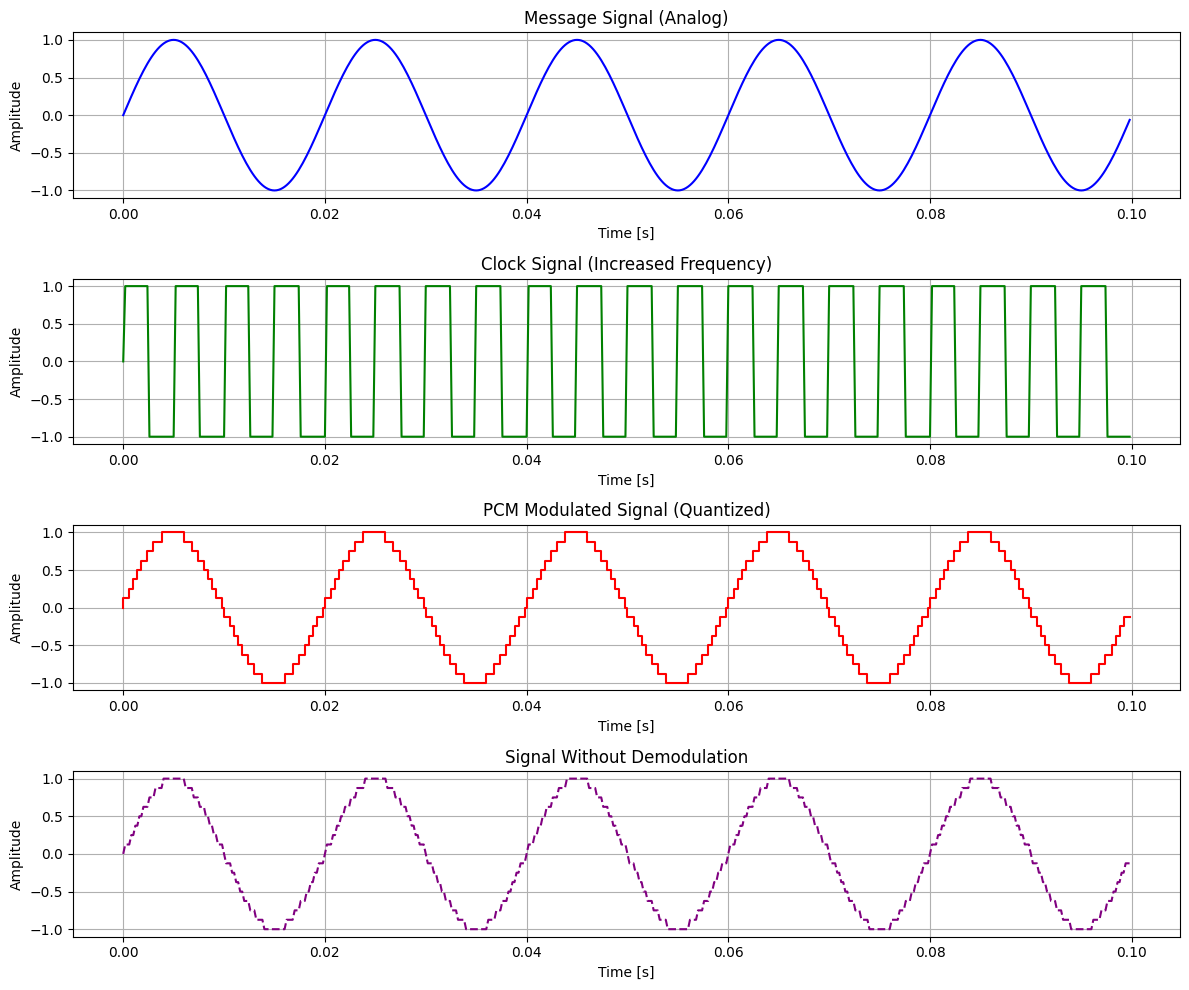

In [5]:
# PCM import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt


# Parameters
sampling_rate = 5000  # Sampling rate (samples per second)
frequency = 50  # Frequency of the message signal (analog signal)
duration = 0.1  # Duration of the signal in seconds
quantization_levels = 16  # Number of quantization levels (PCM resolution)

# Generate time vector
t = np.linspace(0, duration, int(sampling_rate * duration), endpoint=False)

# Generate message signal (analog signal)
message_signal = np.sin(2 * np.pi * frequency * t)

# Generate clock signal (sampling clock) with higher frequency than before
clock_signal = np.sign(np.sin(2 * np.pi * 200 * t))  # Increased clock frequency to 200 Hz

# Quantize the message signal
quantization_step = (max(message_signal) - min(message_signal)) / quantization_levels
quantized_signal = np.round(message_signal / quantization_step) * quantization_step

# Simulate the PCM modulated signal (digital representation)
pcm_signal = (quantized_signal - min(quantized_signal)) / quantization_step
pcm_signal = pcm_signal.astype(int)

# Plotting the results
plt.figure(figsize=(12, 10))

# Plot message signal
plt.subplot(4, 1, 1)
plt.plot(t, message_signal, label="Message Signal (Analog)", color='blue')
plt.title("Message Signal (Analog)")
plt.xlabel("Time [s]")
plt.ylabel("Amplitude")
plt.grid(True)

# Plot clock signal (higher frequency)
plt.subplot(4, 1, 2)
plt.plot(t, clock_signal, label="Clock Signal (Increased Frequency)", color='green')
plt.title("Clock Signal (Increased Frequency)")
plt.xlabel("Time [s]")
plt.ylabel("Amplitude")
plt.grid(True)

# Plot PCM modulated signal (quantized)
plt.subplot(4, 1, 3)
plt.step(t, quantized_signal, label="PCM Modulated Signal", color='red')
plt.title("PCM Modulated Signal (Quantized)")
plt.xlabel("Time [s]")
plt.ylabel("Amplitude")
plt.grid(True)

# Plot 'PCM Demodulation'
plt.subplot(4, 1, 4)
plt.plot(t, quantized_signal, label="Signal Demodulation", color='purple', linestyle='--')
plt.title("Signal Without Demodulation")
plt.xlabel("Time [s]")
plt.ylabel("Amplitude")
plt.grid(True)

plt.tight_layout()
plt.show()